In [1]:
import numpy as np
import math
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial as sp
import pythreejs as threejs
from pythreejs import *

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from objectron.dataset import iou
from objectron.dataset import box

In [2]:
def draw_boxes(boxes = [], clips = [], colors = ['r', 'b', 'g' , 'k']):
  """Draw a list of boxes.

      The boxes are defined as a list of vertices
  """
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  for i, b in enumerate(boxes):
    x, y, z = b[:, 0], b[:, 1], b[:, 2]
    ax.scatter(x, y, z, c = 'r')
    for e in box.EDGES:
      ax.plot(x[e], y[e], z[e], linewidth=2, c=colors[i % len(colors)])

  if (len(clips)):
    points = np.array(clips)
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=100, c='k')
    
  plt.gca().patch.set_facecolor('white')
  ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
  ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
  ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

  # rotate the axes and update
  ax.view_init(30, 12)
  plt.draw()
  plt.show()


In [3]:
# Example predicted box and the GT box from our model/dataset
# v1, red is prediction
v1 = np.array([[-0.33968984, -0.05288385, -1.17507233],
 [-0.40124338,  0.05014238, -1.2934148],
 [-0.43014634, -0.06355323, -1.33895528],
 [-0.47653974,  0.04960908, -1.17049374],
 [-0.5054427,  -0.06408653, -1.21603422],
 [-0.17393698, -0.04168116, -1.13411044],
 [-0.20283994, -0.15537677, -1.17965092],
 [-0.24923333, -0.04221446, -1.01118938],
 [-0.27813629, -0.15591008, -1.05672986]])

# v2, blue is ground truth
v2 = np.array([[-0.28304723, -0.03790521, -0.95919561],
 [-0.34334973,  0.04826891, -1.07497346],
 [-0.35822576, -0.0410708,  -1.09632719],
 [-0.41593161,  0.03950843, -0.98775709],
 [-0.43080765, -0.04983126, -1.00911069],
 [-0.13528676, -0.02597914, -0.90928042],
 [-0.15016282, -0.11531886, -0.93063414],
 [-0.20786867, -0.03473962, -0.82206404],
 [-0.22274472, -0.12407933, -0.84341764]])

scale= -2.091109244641927
center = np.array([-0.18802881,  0.13143663, -0.937361 ])
normal = [-0.63777405, -0.07697788,  0.7663672 ]

iou =  0.3404659405048507
iou (via sampling)=  0.3365930064437869


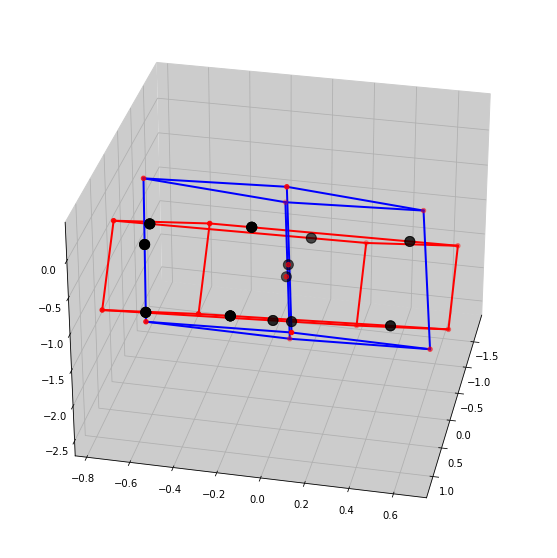

In [5]:
w1 = box.Box(vertices=v1)
w2 = box.Box(vertices=v2)
# Change the scale/position for testing
b1 = box.Box.from_transformation(np.array(w1.rotation), np.array(w1.translation), np.array([3., 1., 0.5]))
b2 = box.Box.from_transformation(np.array(w2.rotation), np.array(w2.translation), np.array([1.9, 1.6, 0.7]))
# 0.3,
loss = iou.IoU(b1, b2)
print('iou = ', loss.iou())
print('iou (via sampling)= ', loss.iou_sampling())
intersection_points = loss.intersection_points

draw_boxes([b1.vertices, b2.vertices],  clips=loss.intersection_points)